# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from sklearn.metrics import confusion_matrix


2023-07-04 08:59:56.192935: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Generate Dataset

## Read data
Chia (70%, 20%, 10%) cho các tập huấn luyện, xác thực và thử nghiệm.

In [2]:
train_df = pd.read_csv('./processed_data/trainset.csv')
val_df = pd.read_csv('./processed_data/valset.csv')
test_df = pd.read_csv('./processed_data/testset.csv')

date_time = pd.to_datetime(test_df.pop('Formatted Date'), format='%Y-%m-%d %H:%M:%S.%f %z')
train_df.drop(['Formatted Date'],axis=1,inplace=True)
val_df.drop(['Formatted Date'],axis=1,inplace=True)

# Parameter

In [3]:
n_timestep = 15
n_timepred = 1
n_feature = len(train_df.columns)

## Scale


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()
train_df = scaler.fit_transform(train_df)
val_df = scaler.fit_transform(val_df)
test_df = scaler.fit_transform(test_df)

### Splitting

In [6]:
def timestep_split(data, n_step):
    x, y = [], []

    length = len(data)
    for i in range(n_step, length):
        x.append(data[i-n_step:i])
        y.append(data[i])
    return np.array(x), np.array(y)

In [7]:
x_train, y_train = timestep_split(data=train_df, n_step=n_timestep)
x_val, y_val = timestep_split(data=val_df, n_step=n_timestep)
x_test, y_test = timestep_split(data=test_df, n_step=n_timestep)

In [8]:
x_train[0], y_train[0]

(array([[0.        , 0.36288363, 0.35291194, 0.89      , 0.62      ,
         0.51659076, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.34938665, 0.63960519,
         0.37059048, 0.98296291, 0.50196398, 0.99999614],
        [0.        , 0.37233372, 0.36500704, 0.85      , 0.615     ,
         0.50829538, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 

# Build model LSTM

In [9]:
model = keras.models.Sequential()

model.add(Input(shape=(n_timestep,n_feature), name='Input'))

model.add(LSTM(units=64, return_sequences=True,name='LSTM_many_to_many'))

model.add(LSTM(units=64, name='LSTM_many_to_one'))

model.add(Dense(units=n_feature, name='Output_layer'))


model.compile(optimizer= 'adam', loss='mse')

model.summary()

2023-07-04 08:59:58.922390: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-07-04 08:59:59.150209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-04 08:59:59.151216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-04 08:59:59.1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_many_to_many (LSTM)    (None, 15, 64)            26624     
                                                                 
 LSTM_many_to_one (LSTM)     (None, 64)                33024     
                                                                 
 Output_layer (Dense)        (None, 39)                2535      
                                                                 
Total params: 62,183
Trainable params: 62,183
Non-trainable params: 0
_________________________________________________________________


2023-07-04 08:59:59.273494: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-04 08:59:59.274425: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-04 08:59:59.275391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

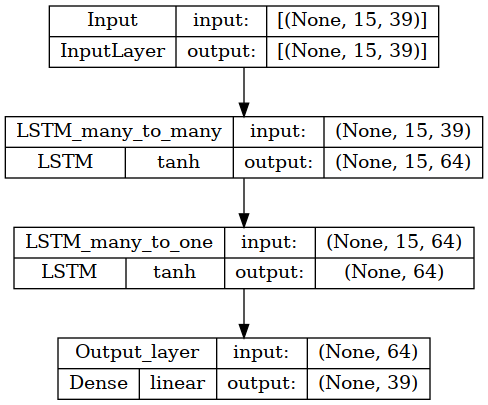

In [10]:
tf.keras.utils.plot_model(model,to_file='./image/model_LSTM.png', show_layer_activations=True, show_shapes=True, show_layer_names=True)


# Train

In [11]:
path = './model/LSTM_model_15timesteps.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=path, monitor='val_loss', save_best_only=True)

In [12]:
model.fit(x_train, y_train, epochs = 75, callbacks=[checkpoint], batch_size=256,validation_data=(x_val, y_val), validation_batch_size=256)

Epoch 1/75


2023-07-04 08:59:59.899362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-04 08:59:59.900189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-04 08:59:59.901071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

260/260 [==============================] - ETA: 0s - loss: 0.0225

2023-07-04 09:00:21.217930: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-04 09:00:21.219544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-04 09:00:21.220521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

260/260 [==============================] - 25s 88ms/step - loss: 0.0225 - val_loss: 0.0139
Epoch 2/75
260/260 [==============================] - 26s 100ms/step - loss: 0.0131 - val_loss: 0.0117
Epoch 3/75
260/260 [==============================] - 25s 96ms/step - loss: 0.0125 - val_loss: 0.0114
Epoch 4/75
260/260 [==============================] - 27s 103ms/step - loss: 0.0122 - val_loss: 0.0111
Epoch 5/75
260/260 [==============================] - 26s 101ms/step - loss: 0.0121 - val_loss: 0.0110
Epoch 6/75
260/260 [==============================] - 26s 101ms/step - loss: 0.0120 - val_loss: 0.0109
Epoch 7/75
260/260 [==============================] - 28s 107ms/step - loss: 0.0120 - val_loss: 0.0107
Epoch 8/75
260/260 [==============================] - 27s 103ms/step - loss: 0.0119 - val_loss: 0.0108
Epoch 9/75
260/260 [==============================] - 33s 128ms/step - loss: 0.0119 - val_loss: 0.0108
Epoch 10/75
260/260 [==============================] - 39s 150ms/step - loss: 0.0119 -

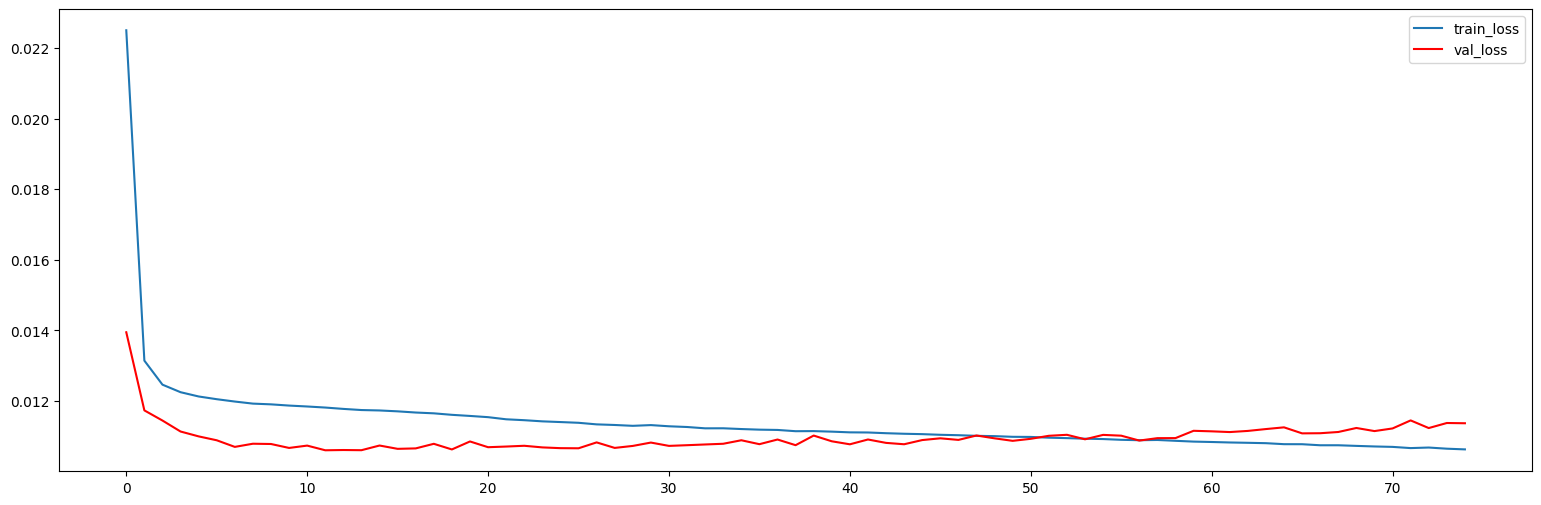

In [13]:
plt.figure(figsize=(19, 6))
plt.plot(model.history.history['loss'], label='train_loss')
plt.plot(model.history.history['val_loss'], c='red', label='val_loss')
plt.legend()

# Evaluate

In [14]:
#load best model
model = keras.models.load_model(path)

2023-07-04 09:34:37.623773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-04 09:34:37.625018: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-04 09:34:37.625917: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [15]:
y_predict = model.predict(x_test)

y_predict_inverse = scaler.inverse_transform(y_predict)
y_test_inverse = scaler.inverse_transform(y_test)

2023-07-04 09:34:37.999253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-04 09:34:38.000286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-04 09:34:38.001149: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

297/297 [==============================] - 4s 12ms/step


In [16]:
y_predict_inverse[0]

array([ 2.12381501e-02,  1.45895777e+01,  1.33270521e+01,  5.61467469e-01,
        1.39160414e+01,  1.02968958e+03,  2.14365460e-02,  1.52961118e-02,
       -1.27667785e-02, -1.36151006e-02,  1.05422493e-02,  1.39419055e-02,
        5.51993102e-02,  4.79540881e-03,  4.13775351e-03, -9.33669601e-03,
       -2.47051893e-03,  1.54608693e-02, -3.07073705e-02, -2.44271010e-03,
       -4.75731026e-03, -1.33102871e-02, -2.83187861e-03,  1.03868194e-01,
       -3.66980471e-02,  8.85545075e-01,  4.89911810e-03, -4.22575464e-03,
       -4.21431521e-03,  4.91831452e-05,  7.24095851e-04,  6.15790114e-03,
       -1.12967566e-03,  6.69162703e+00,  4.52621603e+00,  4.09036398e-01,
       -7.95222998e-01, -9.98553813e-01, -4.85377237e-02], dtype=float32)

In [17]:
y_test_inverse[0]

array([ 0.00000000e+00,  1.70833333e+01,  1.70833333e+01,  4.80000000e-01,
        9.98200000e+00,  1.03046000e+03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.14563577e-01,  7.91034427e+00,  5.00000000e-01,
       -8.66025404e-01, -9.99972932e-01, -7.35770473e-03])

## Precip Type

In [18]:
rain = y_predict_inverse[:,0] < 0.5
snow = y_predict_inverse[:,0] >= 0.5
y_predict_inverse[rain,0] = 0
y_predict_inverse[snow,0] = 1

In [19]:
BA = keras.metrics.BinaryAccuracy(threshold=0.5)
BA.update_state(y_test_inverse[:,0], y_predict_inverse[:,0])
R_Accuracy = float(BA.result())
print('Độ chính xác khi dự đoán mưa hay không: {:.2f}%'.format(R_Accuracy*100))

Độ chính xác khi dự đoán mưa hay không: 98.99%


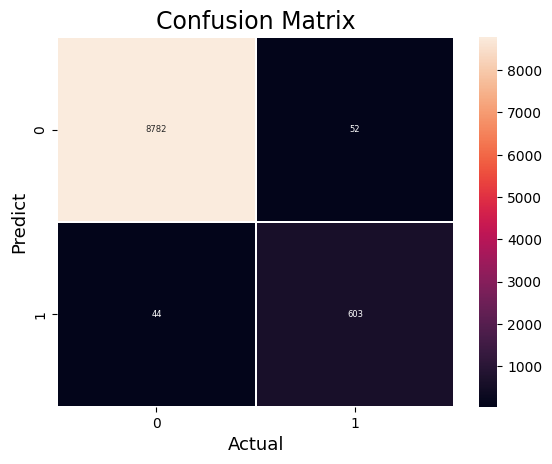

In [20]:
# compute the confusion matrix
cm = confusion_matrix(y_test_inverse[:,0], y_predict_inverse[:,0])
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            linewidths= 0.2,
            annot_kws={"size": 6})
plt.xlabel('Actual',fontsize=13)
plt.ylabel('Predict',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)

plt.show()

## Temperature

In [21]:
from keras.metrics import mean_absolute_error

In [22]:
# mean absolute error
mean = float(mean_absolute_error(y_test_inverse[:,1], y_predict_inverse[:,1]))
print('Độ lệch trung bình là: {:.3f}'.format(mean))

Độ lệch trung bình là: 1.360


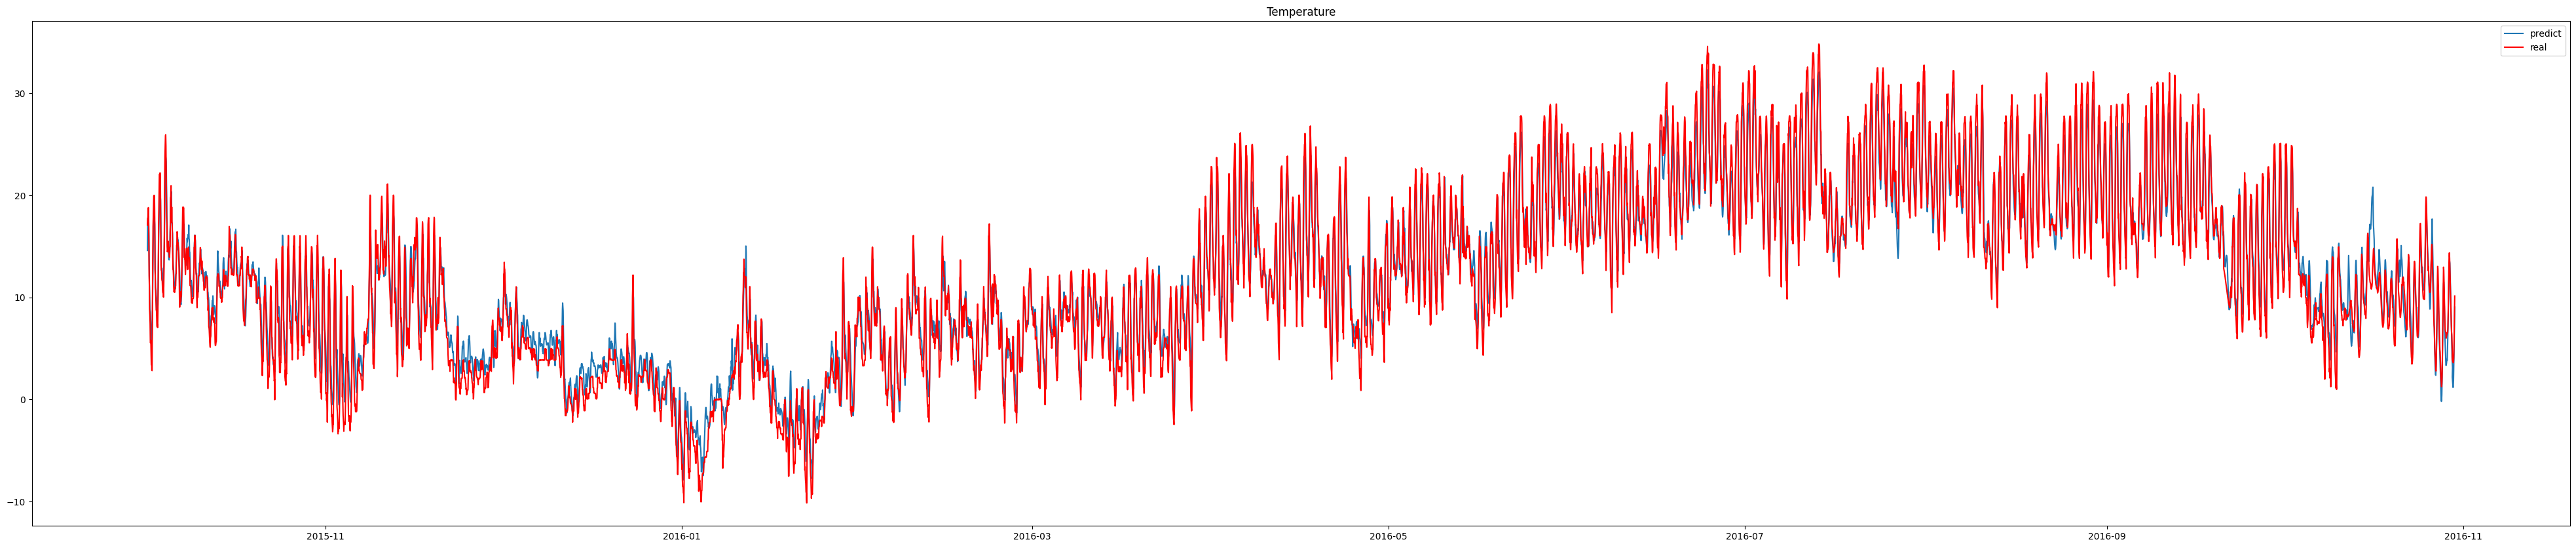

In [23]:
#visualization
plt.figure(figsize=(50,10))
plt.plot(date_time[n_timestep:], y_predict_inverse[:,1], label='predict')
plt.plot(date_time[n_timestep:], y_test_inverse[:,1], c='red', label='real')
plt.title('Temperature')
plt.legend()

## Apparent Temperature

In [24]:
# mean absolute error
mean = float(mean_absolute_error(y_test_inverse[:,2], y_predict_inverse[:,2]))
print('Độ lệch trung bình là: {:.3f}'.format(mean))

Độ lệch trung bình là: 1.392


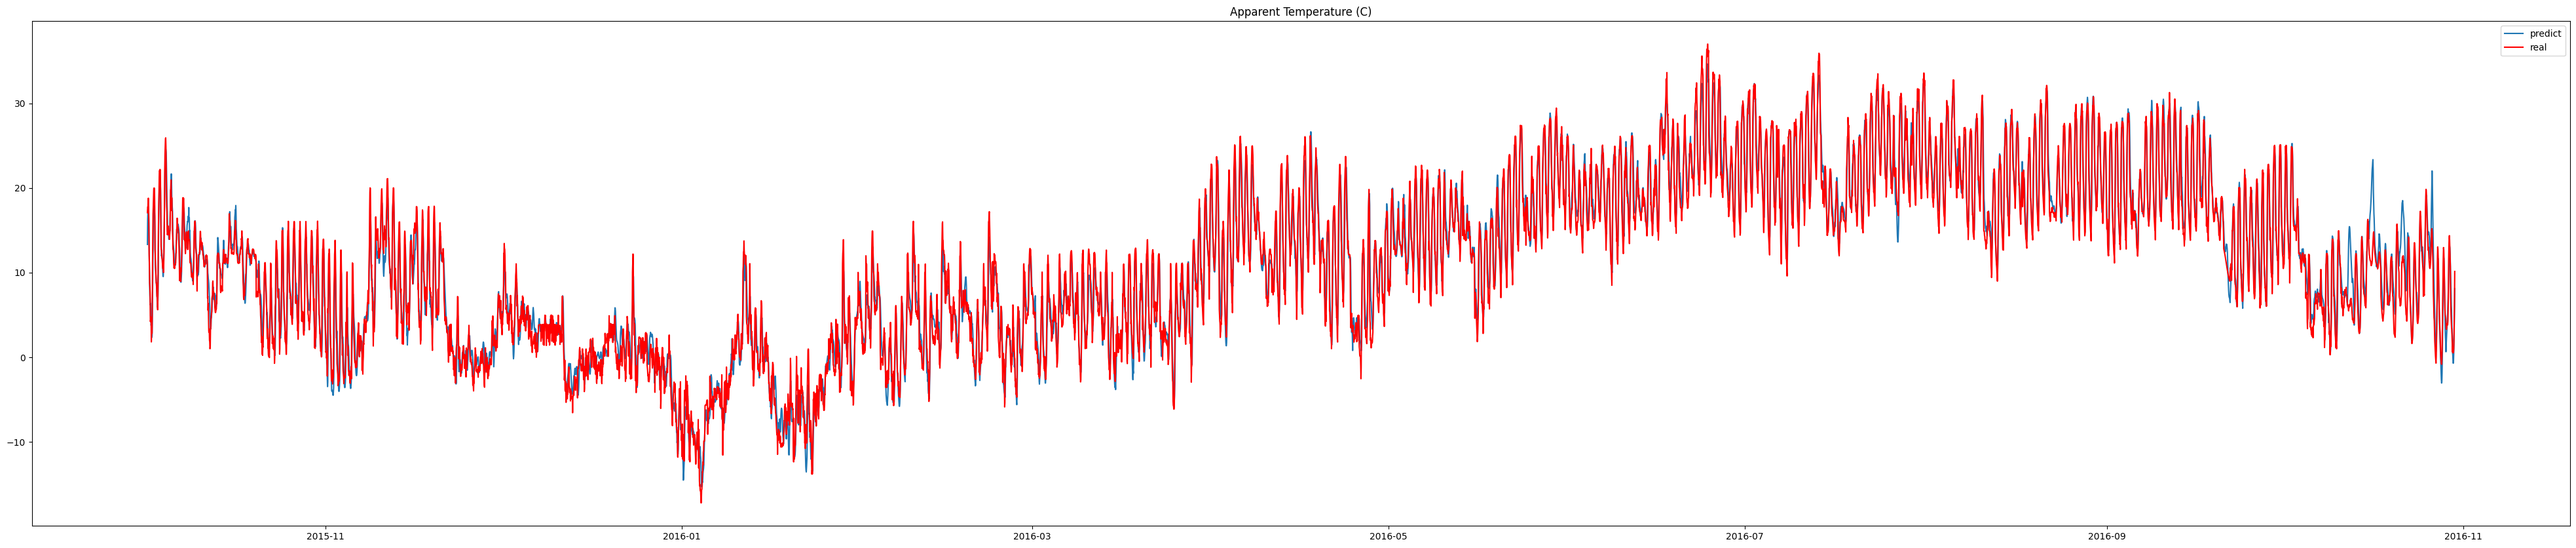

In [25]:
#visualization
plt.figure(figsize=(50,10))
plt.plot(date_time[n_timestep:], y_predict_inverse[:,2], label='predict')
plt.plot(date_time[n_timestep:], y_test_inverse[:,2], c='red', label='real')
plt.title('Apparent Temperature (C)')
plt.legend()

## Humidity

In [26]:
# mean absolute error
mean = float(mean_absolute_error(y_test_inverse[:,3], y_predict_inverse[:,3]))
print('Độ lệch trung bình là: {:.3f}'.format(mean))

Độ lệch trung bình là: 0.041


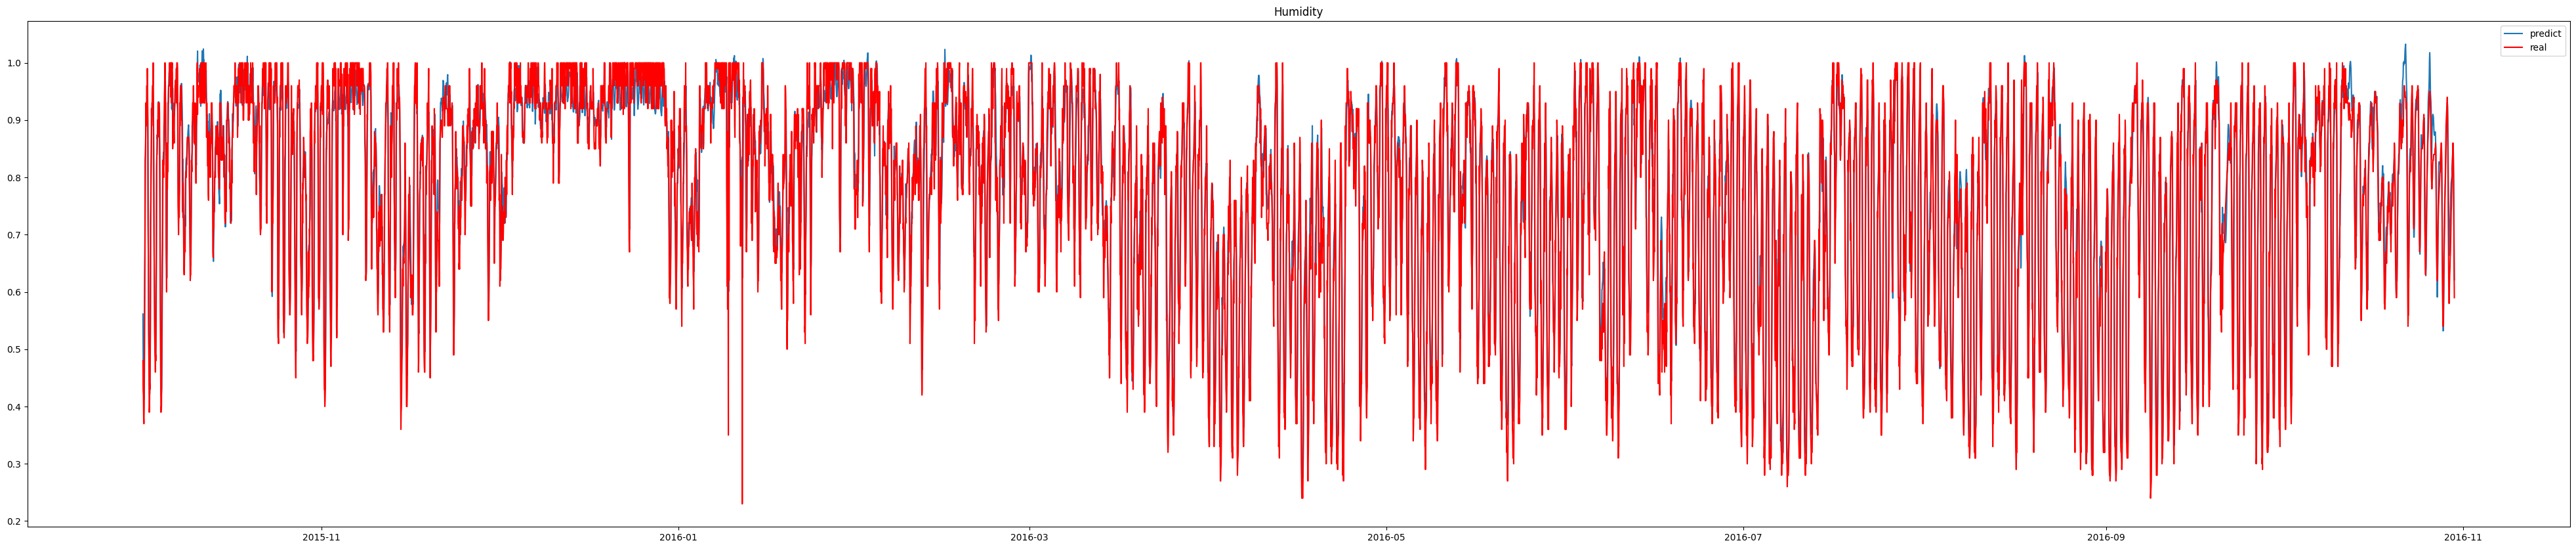

In [27]:
#visualization
plt.figure(figsize=(50,10))
plt.plot(date_time[ n_timestep:], y_predict_inverse[:,3], label='predict')
plt.plot(date_time[ n_timestep:], y_test_inverse[:,3], c='red', label='real')
plt.title('Humidity')
plt.legend()

## Visibility

In [28]:
# mean absolute error
mean = float(mean_absolute_error(y_test_inverse[:,4], y_predict_inverse[:,4]))
print('Độ lệch trung bình là: {:.3f}'.format(mean))

Độ lệch trung bình là: 1.708


In [29]:
#visualization
plt.figure(figsize=(50,10))
plt.plot(date_time[n_timestep:], y_predict_inverse[:,4], label='predict')
plt.plot(date_time[n_timestep:], y_test_inverse[:,4], c='red', label='real')
plt.title('Visibility (km)')
plt.legend()

## Pressure

In [30]:
# mean absolute error
mean = float(mean_absolute_error(y_test_inverse[:,5], y_predict_inverse[:,5]))
print('Độ lệch trung bình là: {:.3f}'.format(mean))

Độ lệch trung bình là: 1.143


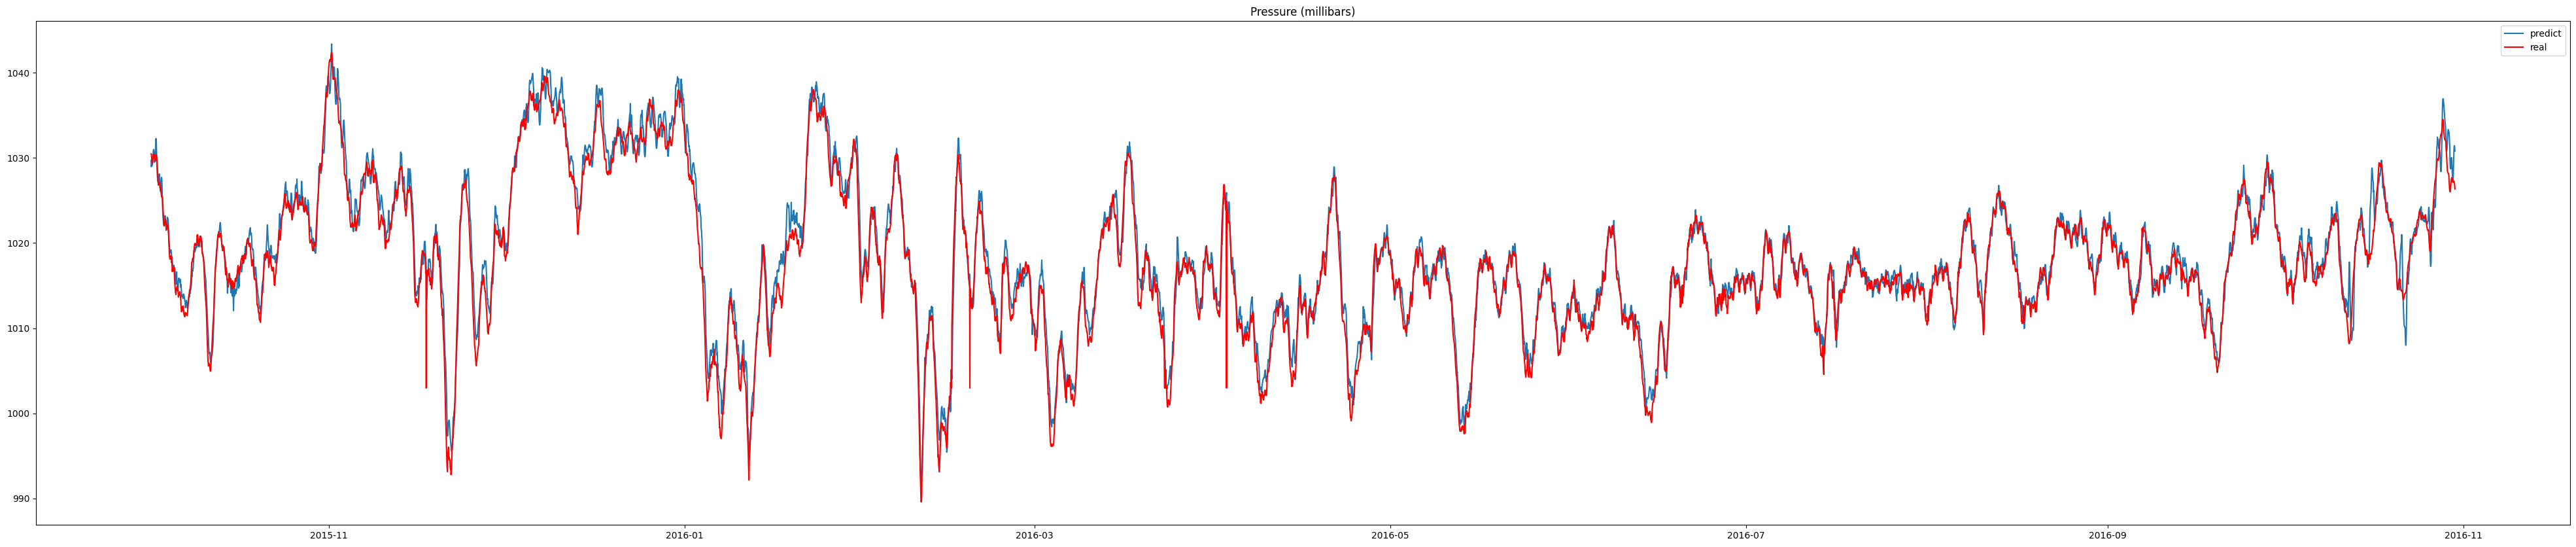

In [31]:
#visualization
plt.figure(figsize=(50,10))
plt.plot(date_time[n_timestep:], y_predict_inverse[:,5], label='predict')
plt.plot(date_time[n_timestep:], y_test_inverse[:,5], c='red', label='real')
plt.title('Pressure (millibars)')
plt.legend()

## Summary

In [32]:
max_indices_pre = np.argmax(y_predict_inverse[:, 6:33], axis=1)
print(max_indices_pre)

[19 19 19 ...  6  6  6]


In [33]:
max_indices_test = np.argmax(y_test_inverse[:, 6:33], axis=1)
print(max_indices_test)

[19 19 19 ...  6  6  6]


In [34]:
from sklearn.metrics import accuracy_score
accuracy_score( max_indices_test,max_indices_pre)

0.7811412298280772

In [35]:
# compute the confusion matrix
cm = confusion_matrix(max_indices_test,max_indices_pre)
 
#Plot the confusion matrix.

sns.heatmap(cm,
            annot=True,
            fmt='g',
            linewidths= 0.2,
            annot_kws={"size": 6})
# plt.figure(figsize= (5, 5))
plt.xlabel('Actual',fontsize=13)
plt.ylabel('Predict',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)

plt.show()

## Wind Speed (km/h) And Wind Bearing (degrees)

In [36]:
def convertWind(wx, wy):
    # Chuyển đổi Wx và Wy về 'Wind Speed (km/h)'
    w_speed = np.sqrt(wx**2 + wy**2)
   
    # Chuyển đổi Wx và Wy về 'Wind Bearing (degrees)'
    w_bearing = np.arctan2(wy, wx) * 180 / np.pi
    return w_speed, w_bearing

In [37]:
w_speed_test, w_bearing_test = convertWind(y_test_inverse[:,33], y_test_inverse[:,34])
w_speed_pred, w_bearing_pred = convertWind(y_predict_inverse[:,33], y_predict_inverse[:,34])


In [38]:
# mean absolute error
mean = float(mean_absolute_error(w_speed_test, w_speed_pred))
print('Độ lệch trung bình là: {:.3f}'.format(mean))

Độ lệch trung bình là: 3.170


In [39]:
#visualization
plt.figure(figsize=(50,10))
plt.plot(date_time[n_timestep:], w_speed_pred, label='predict')
plt.plot(date_time[n_timestep:], w_speed_test, c='red', label='real')
plt.title('Wind Speed (km/h)')
plt.legend()

In [40]:
# mean absolute error
mean = float(mean_absolute_error(w_bearing_test, w_bearing_pred))
print('Độ lệch trung bình là: {:.3f}'.format(mean))

Độ lệch trung bình là: 50.905


In [41]:
#visualization
plt.figure(figsize=(50,10))
plt.plot(date_time[n_timestep:], w_bearing_pred, label='predict')
plt.plot(date_time[n_timestep:], w_bearing_test, c='red', label='real')
plt.title('Wind Bearing (degrees)')
plt.legend()